# Matplotlib & Pandas Graphing Guide (All-in-One, Fully English Data)
All chart labels, legends, and **data columns** are in English to avoid font issues across environments.

## 0. Setup
Imports, style, and basic configuration.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-whitegrid')
#from matplotlib import rcParams
#rcParams['axes.unicode_minus'] = False
print('pandas:', pd.__version__)
print('matplotlib:', plt.matplotlib.__version__)
print('numpy:', np.__version__)


pandas: 2.3.3
matplotlib: 3.10.8
numpy: 2.4.0


## Step 1: Plot from lists

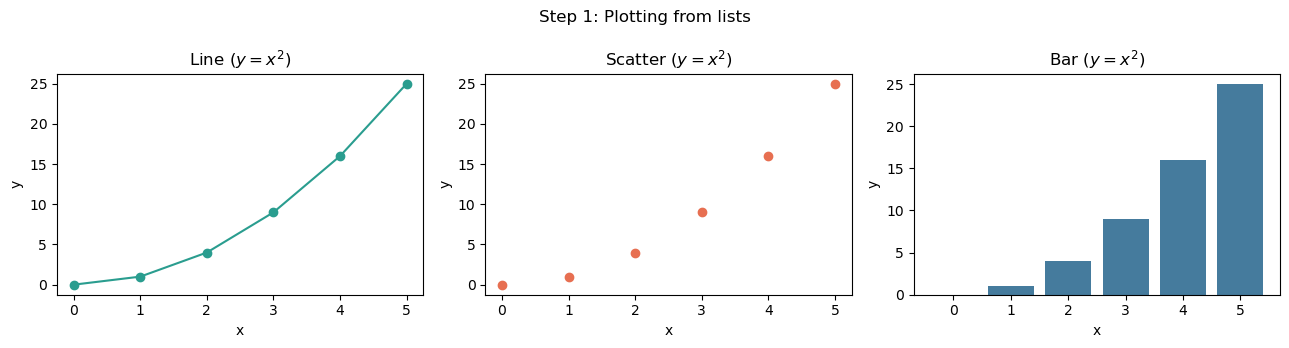

In [17]:
x = [0,1,2,3,4,5]
y = [0,1,4,9,16,25]
fig, axes = plt.subplots(1,3, figsize=(13,3.5))
axes[0].plot(x,y,marker='o',color='#2a9d8f'); axes[0].set_title(r'Line ($y = x^2$)'); axes[0].set_xlabel('x'); axes[0].set_ylabel('y')
axes[1].scatter(x,y,color='#e76f51'); axes[1].set_title(r'Scatter ($y = x^2$)'); axes[1].set_xlabel('x'); axes[1].set_ylabel('y')
axes[2].bar(x,y,color='#457b9d'); axes[2].set_title(r'Bar ($y = x^2$)'); axes[2].set_xlabel('x'); axes[2].set_ylabel('y')
fig.suptitle('Step 1: Plotting from lists')
plt.tight_layout()
plt.show()


## Step 2: Functions + append

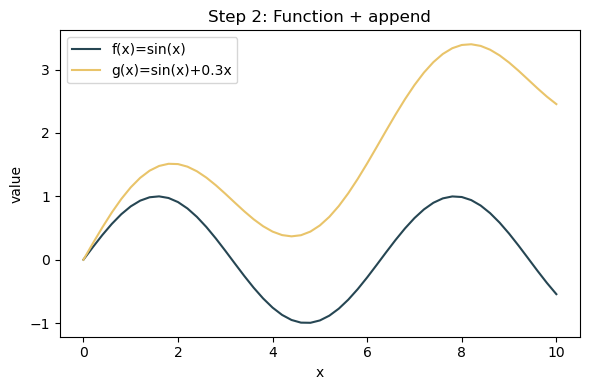

In [18]:
def f(x): return math.sin(x)
def g(x): return math.sin(x) + 0.3*x
x2,yf,yg=[],[],[]
cur=0.0
while cur<=10.0+1e-9:
    x2.append(cur); yf.append(f(cur)); yg.append(g(cur)); cur+=0.2
plt.figure(figsize=(6,4))
plt.plot(x2,yf,label='f(x)=sin(x)',color='#264653')
plt.plot(x2,yg,label='g(x)=sin(x)+0.3x',color='#e9c46a')
plt.title('Step 2: Function + append')
plt.xlabel('x')
plt.ylabel('value')
plt.legend()
plt.tight_layout()
plt.show()


## Step 3: NumPy vectorization

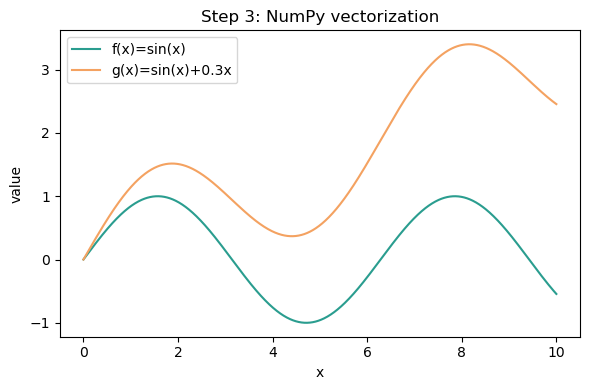

In [ ]:
x3 = np.arange(0,10.0+1e-12,0.01)
y3f = np.sin(x3); y3g = np.sin(x3)+0.3*x3
plt.figure(figsize=(6,4))
plt.plot(x3,y3f,label='f(x)=sin(x)',color='#2a9d8f')
plt.plot(x3,y3g,label='g(x)=sin(x)+0.3x',color='#f4a261')
plt.title('Step 3: NumPy vectorization')
plt.xlabel('x')
plt.ylabel('value')
plt.legend()
plt.tight_layout()
plt.show()


## Advanced: Subplots & annotation

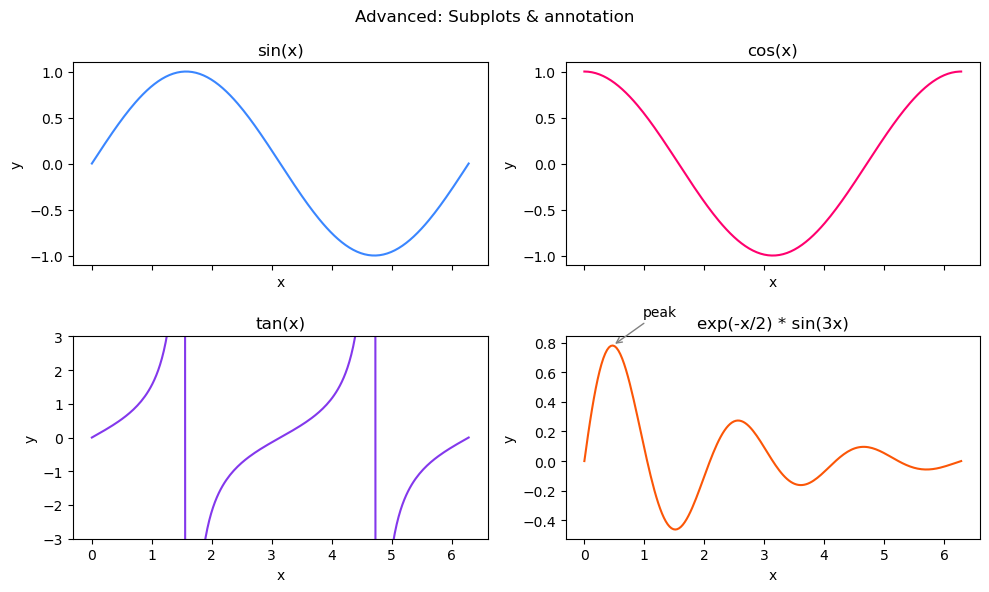

In [6]:
fig,axs = plt.subplots(2,2, figsize=(10,6), sharex=True)
x = np.linspace(0,2*np.pi,200)
axs[0,0].plot(x,np.sin(x),color='#3a86ff'); axs[0,0].set_title('sin(x)')
axs[0,1].plot(x,np.cos(x),color='#ff006e'); axs[0,1].set_title('cos(x)')
axs[1,0].plot(x,np.tan(x),color='#8338ec'); axs[1,0].set_title('tan(x)'); axs[1,0].set_ylim(-3,3)
y = np.exp(-x/2)*np.sin(3*x)
axs[1,1].plot(x,y,color='#fb5607'); axs[1,1].set_title('exp(-x/2) * sin(3x)')
pkx = x[np.argmax(y)]; pky = y.max()
axs[1,1].annotate('peak', xy=(pkx,pky), xytext=(pkx+0.5,pky+0.2), arrowprops=dict(arrowstyle='->', color='gray'))
for ax in axs.flat: ax.set_xlabel('x'); ax.set_ylabel('y')
fig.suptitle('Advanced: Subplots & annotation'); plt.tight_layout(); plt.show()


---
# Real Data: CSV/Excel (Fully English data)
We load **English** sample files: `sales_sample_en.csv` and `sensor_sample_en.xlsx`.

In [7]:
sales = pd.read_csv('sales_sample_en.csv', parse_dates=['date'])
sales.head()


,date,category,qty,unit_price,amount
0,2024-01-01,Food_A,127,250,31750
1,2024-01-01,Beverage_B,78,180,14040
2,2024-01-01,Goods_C,69,500,34500
3,2024-01-02,Food_A,143,250,35750
4,2024-01-02,Beverage_B,76,180,13680


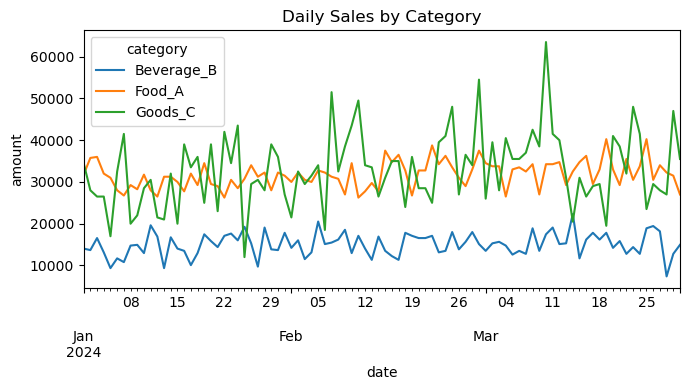

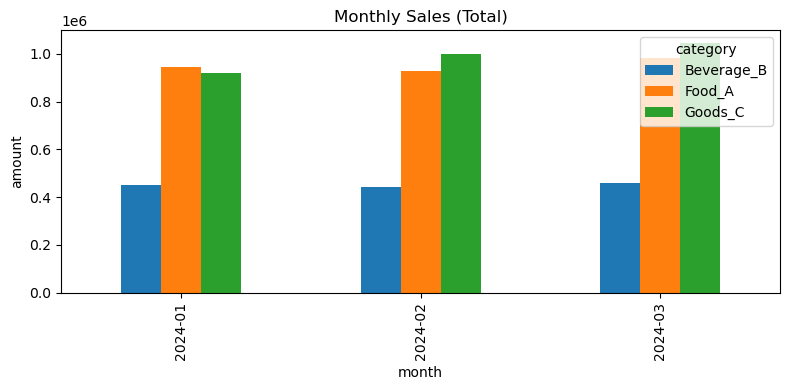

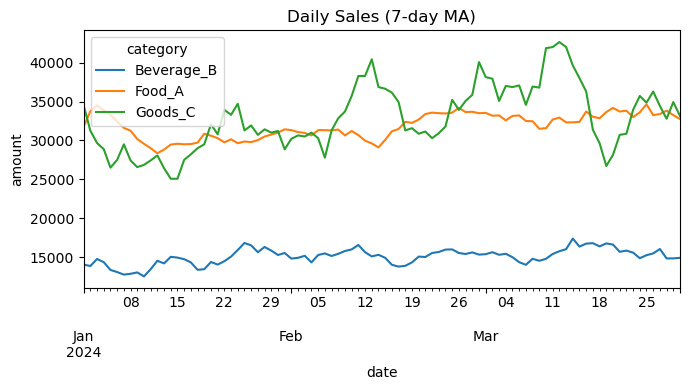

In [8]:
# Daily sales by category (English category names => legend in English)
daily = sales.groupby(['date','category'], as_index=False)['amount'].sum()
pivot = daily.pivot(index='date', columns='category', values='amount')
ax = pivot.plot(figsize=(7,4), title='Daily Sales by Category', ylabel='amount')
ax.set_xlabel('date'); plt.tight_layout(); plt.show()
# Monthly totals
monthly = sales.groupby([sales['date'].dt.to_period('M'),'category'])['amount'].sum().reset_index()
monthly['month'] = monthly['date'].astype(str)
ax = monthly.pivot(index='month', columns='category', values='amount').plot(kind='bar', figsize=(8,4), title='Monthly Sales (Total)')
ax.set_xlabel('month'); ax.set_ylabel('amount'); plt.tight_layout(); plt.show()
# 7-day moving average
ma7 = pivot.rolling(window=7, min_periods=1).mean()
ax = ma7.plot(figsize=(7,4), title='Daily Sales (7-day MA)', ylabel='amount')
ax.set_xlabel('date'); plt.tight_layout(); plt.show()


## Read Excel (Sensors, English columns)

In [9]:
sensor = pd.read_excel('sensor_sample_en.xlsx', engine='openpyxl', parse_dates=['time'])
sensor.head()


,time,temp_C,humidity_pct
0,2024-02-01 00:00:00,19.15,64.13
1,2024-02-01 00:15:00,17.21,67.92
2,2024-02-01 00:30:00,18.06,66.23
3,2024-02-01 00:45:00,19.27,64.52
4,2024-02-01 01:00:00,19.43,67.77


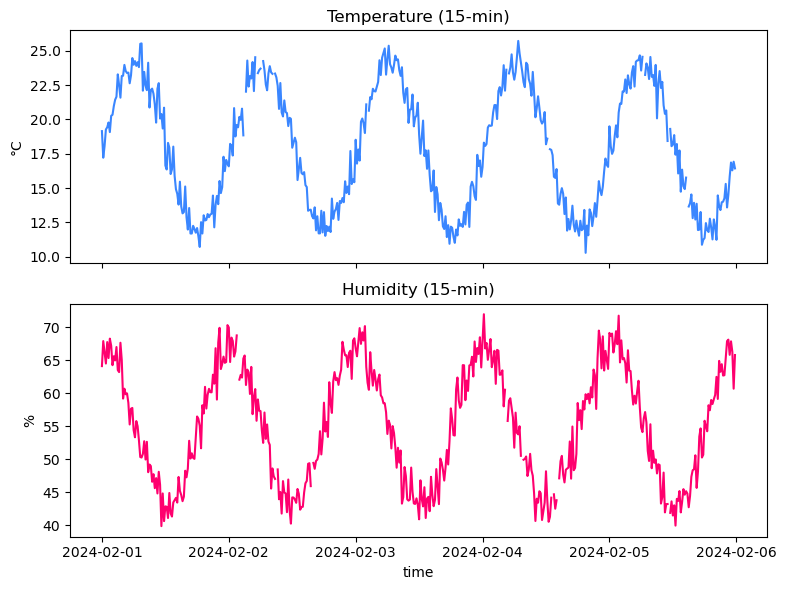

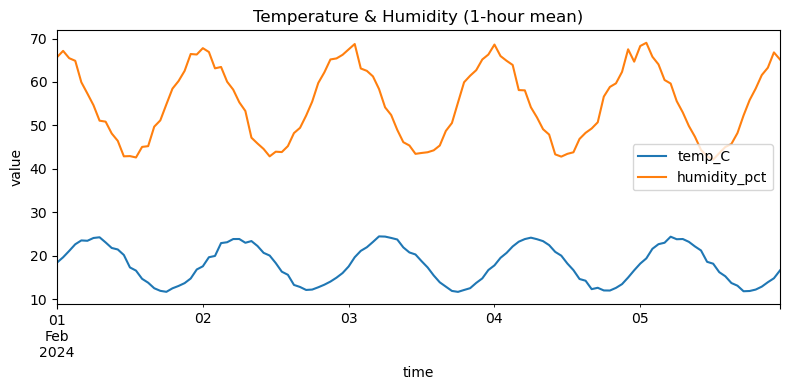

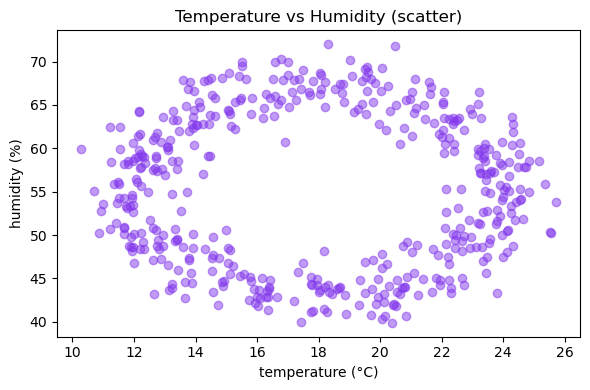

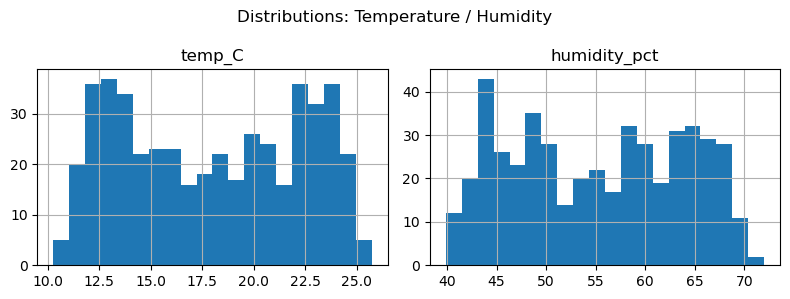

In [10]:
fig, ax = plt.subplots(2,1, figsize=(8,6), sharex=True)
ax[0].plot(sensor['time'], sensor['temp_C'], color='#3a86ff'); ax[0].set_title('Temperature (15-min)'); ax[0].set_ylabel('°C')
ax[1].plot(sensor['time'], sensor['humidity_pct'], color='#ff006e'); ax[1].set_title('Humidity (15-min)'); ax[1].set_xlabel('time'); ax[1].set_ylabel('%')
plt.tight_layout(); plt.show()
# 1-hour mean
sensor_idx = sensor.set_index('time')
hourly = sensor_idx.resample('1h').mean()
ax = hourly.plot(figsize=(8,4), title='Temperature & Humidity (1-hour mean)')
ax.set_xlabel('time'); ax.set_ylabel('value'); plt.tight_layout(); plt.show()
# Scatter
plt.figure(figsize=(6,4))
plt.scatter(sensor['temp_C'], sensor['humidity_pct'], alpha=0.5, color='#8338ec')
plt.title('Temperature vs Humidity (scatter)'); plt.xlabel('temperature (°C)'); plt.ylabel('humidity (%)'); plt.tight_layout(); plt.show()
# Histogram
sensor[['temp_C','humidity_pct']].hist(figsize=(8,3), bins=20)
plt.suptitle('Distributions: Temperature / Humidity'); plt.tight_layout(); plt.show()


## Missing values & cleaning

Missing rate (%): time            0.000000
temp_C          2.083333
humidity_pct    1.666667
dtype: float64


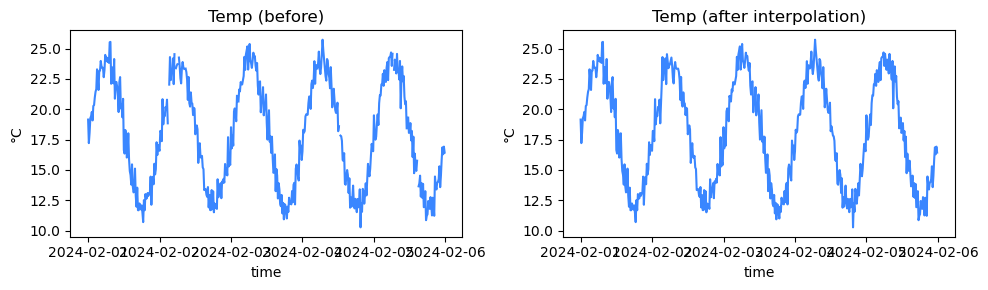

In [11]:
missing_rate = sensor.isna().mean()*100
print('Missing rate (%):', missing_rate)
sensor_clean = sensor.set_index('time').interpolate(method='time').reset_index()
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(sensor['time'], sensor['temp_C'], color='#3a86ff'); ax[0].set_title('Temp (before)')
ax[1].plot(sensor_clean['time'], sensor_clean['temp_C'], color='#3a86ff'); ax[1].set_title('Temp (after interpolation)')
for a in ax: a.set_xlabel('time'); a.set_ylabel('°C')
plt.tight_layout(); plt.show()


## Finishing: annotation & save

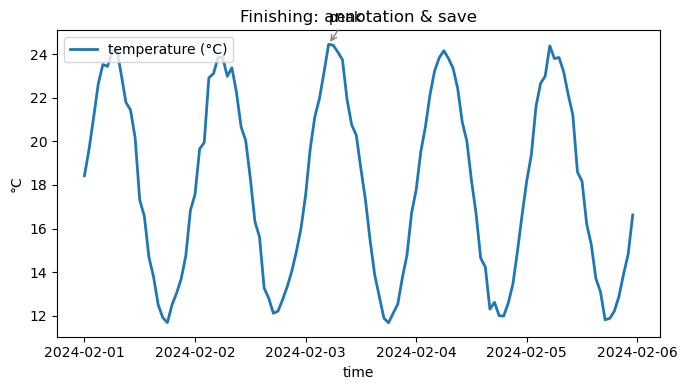

Saved file: sensor_hourly_temperature_en.png


In [12]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(hourly.index, hourly['temp_C'], label='temperature (°C)', color='#1f77b4', linewidth=2)
ax.set_title('Finishing: annotation & save'); ax.set_xlabel('time'); ax.set_ylabel('°C')
pk_idx = hourly['temp_C'].idxmax(); pk_val = hourly['temp_C'].max()
ax.annotate('peak', xy=(pk_idx, pk_val), xytext=(pk_idx, pk_val+1), arrowprops=dict(arrowstyle='->', color='gray'))
ax.legend(loc='upper left'); plt.tight_layout(); plt.savefig('sensor_hourly_temperature_en.png', dpi=150); plt.show()
print('Saved file: sensor_hourly_temperature_en.png')


---
# Summary
- Fully English labels **and** data ensure clean legends and cross-platform compatibility.